In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import os

In [21]:
data = pd.read_csv("data.csv",header=None)
data = data.sample(frac=1)
data = data.reset_index(drop=True)
labels = data[0]
data = data.drop(0,axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.30, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = np.asarray(y_train.values.tolist())
y_test = np.asarray(y_test.values.tolist())

In [22]:
def modelAccuracy(modelname, predictions, test_gs):
    mcounter = 0
    for i in range(len(predictions)):
        if(predictions[i]!=test_gs[i]):
            mcounter+=1
    print(str(modelname)+" accuracy: "+str((1-(mcounter/len(predictions)))))
    return (1-(mcounter/len(predictions)))


In [23]:
def displayStats(predictions, truth):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    cmat = confusion_matrix(truth,predictions)
    disp = ConfusionMatrixDisplay(cmat)
    disp.plot()
    plt.show()

In [24]:
from catboost import CatBoostClassifier
cbm = CatBoostClassifier()
cbm.fit(X_train,y_train)

Learning rate set to 0.003887
0:	learn: 0.6906076	total: 76.5ms	remaining: 1m 16s
1:	learn: 0.6889185	total: 152ms	remaining: 1m 15s
2:	learn: 0.6868827	total: 228ms	remaining: 1m 15s
3:	learn: 0.6846286	total: 308ms	remaining: 1m 16s
4:	learn: 0.6825418	total: 386ms	remaining: 1m 16s
5:	learn: 0.6798468	total: 465ms	remaining: 1m 17s
6:	learn: 0.6782810	total: 549ms	remaining: 1m 17s
7:	learn: 0.6758632	total: 628ms	remaining: 1m 17s
8:	learn: 0.6736180	total: 712ms	remaining: 1m 18s
9:	learn: 0.6715114	total: 794ms	remaining: 1m 18s
10:	learn: 0.6687110	total: 869ms	remaining: 1m 18s
11:	learn: 0.6669088	total: 951ms	remaining: 1m 18s
12:	learn: 0.6648891	total: 1.03s	remaining: 1m 18s
13:	learn: 0.6628645	total: 1.12s	remaining: 1m 19s
14:	learn: 0.6591311	total: 1.2s	remaining: 1m 18s
15:	learn: 0.6570653	total: 1.26s	remaining: 1m 17s
16:	learn: 0.6550294	total: 1.31s	remaining: 1m 15s
17:	learn: 0.6534505	total: 1.35s	remaining: 1m 13s
18:	learn: 0.6512764	total: 1.4s	remaining: 

In [25]:
pred_test = cbm.predict(X_test)
modelAccuracy("CatBoost", pred_test, y_test)
soft_preds = cbm.predict_proba(X_test)[:,1]
print("CatBoost ROC-AUC: "+ str(roc_auc_score(y_test,soft_preds)))

CatBoost accuracy: 0.7333333333333334
CatBoost ROC-AUC: 0.7648221343873518


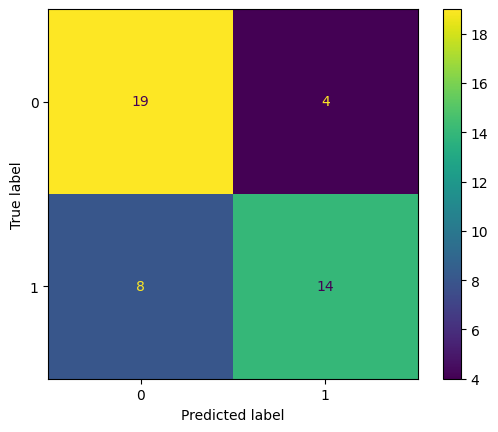

In [26]:
displayStats(pred_test,y_test)